# 네트워크

In [1]:
def step_function(x, th):
  if x<=th:
    return 0
  else:
    return 1

In [2]:
x1=1
x2=0.5

w1=1
w2=1
b=0.5

th=0.5

Z = x1*w1 + x2*w2 + b
A = step_function(Z,th)
A

1

1.  이거 그대로. 문제가 어떻게 나오든 상관없이. 2-3-4-2-1 결과 하나 나오도록만.

In [3]:
import numpy as np

In [4]:
def relu(x):
  return np.maximum(0, x)

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [5]:
X = np.array([1, 0.5])
W1 = np.random.randn(6).reshape((2, 3))
B1 = np.random.rand(3)
Z1 = np.dot(X, W1) +B1
A1 = relu(Z1)
W2 = np.random.randn(12).reshape((3, 4))
B2 = np.random.rand(4)
Z2 = np.dot(A1, W2) +B2
A2 = relu(Z2)
W3 = np.random.randn(8).reshape((4, 2))
B3 = np.random.rand(2)
Z3 = np.dot(A2, W3) +B3
A3 = relu(Z3)
W4 = np.random.randn(2).reshape((2, 1))
B4 = np.random.rand(1)
Z4 = np.dot(A3, W4) +B4
y_pred = sigmoid(Z4)
print(y_pred)

[0.38279075]


#CNN(transfer learning - predict)
VGG16 마지막 레이어 3층을 TRAINABLE하게. 새로 w랑 b 구해서... images, labels...
class 2~3개로 잡고 이미지는 한 클래스당 20장 이상... 라벨 미리 잡아두기...

In [6]:
# load model
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [7]:
class_names=['pooh', 'shiro','doraemon']
base_dir = '/content/images'
X_data = []
y_data = []
for i, class_name in enumerate(class_names):
  folder_dir = os.path.join(base_dir,class_name)

  for file_name in os.listdir(folder_dir):
    img_file = os.path.join(folder_dir, file_name)
    img = cv2.imread(img_file)
    if img is None:
      pass
    else:
      img_resized = cv2.resize(img, (224, 224))
      img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
      img_scaled = preprocess_input(img_rgb)
      X_data.append(img_scaled)
      y_data.append(i)

X_data =np.array(X_data)
y_data =np.array(y_data)
print(X_data.shape)
print(y_data.shape)

(60, 224, 224, 3)
(60,)


In [8]:
base_model = VGG16(include_top=False,
                   weights='imagenet',
                   input_shape=(224, 224, 3))
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [9]:
base_model.trainable=False
model=Sequential([
    base_model,
    Flatten(), #베이스모델에 이미 넣어줘서 인풋쉐잎 안 넣어도 됨
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax') #Dense(1, activation='sigmoid')
])#레이어는 리스트랑 같음. 한층 한층 한층. 이미지 base_model이 제일 먼저 받음

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  #1. 원핫인코딩했으면 categorical_crossentropy/ 바이너리로 하면 binary_crossentropy
              metrics=['accuracy'])

In [10]:
history = model.fit(X_data, y_data, epochs=5)

Epoch 1/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 36s 16s/step - accuracy: 0.3819 - loss: 7.2163
Epoch 2/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 34s 16s/step - accuracy: 0.8701 - loss: 0.6252
Epoch 3/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 16s/step - accuracy: 1.0000 - loss: 0.0274
Epoch 4/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 35s 16s/step - accuracy: 1.0000 - loss: 9.5150e-04
Epoch 5/5
2/2 ━━━━━━━━━━━━━━━━━━━━ 33s 16s/step - accuracy: 1.0000 - loss: 9.5197e-04


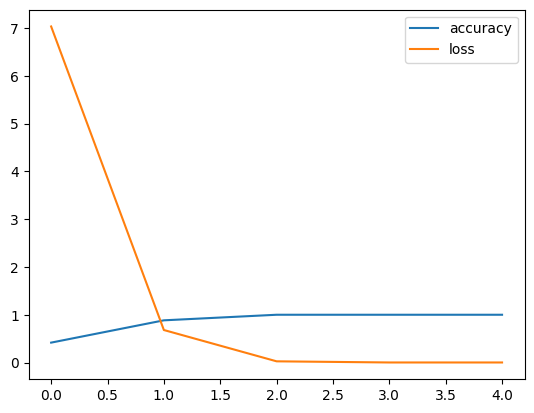

In [22]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['loss'], label = 'loss')
plt.legend()
plt.show()

In [20]:
img_file = '/content/s.jpg'

def img_preprocess(img_file):
  img = cv2.imread(img_file)
  img_resized = cv2.resize(img, (224, 224))
  img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
  img_scaled = preprocess_input(img_rgb)
  img_batch = np.expand_dims(img_scaled, axis = 0)
  print(img_batch.shape)
  return img_batch

img = img_preprocess(img_file)
prediction = model.predict(img)
print(np.argmax(prediction))

(1, 224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 510ms/step
1


Text(0.5, 1.0, 'shiro')

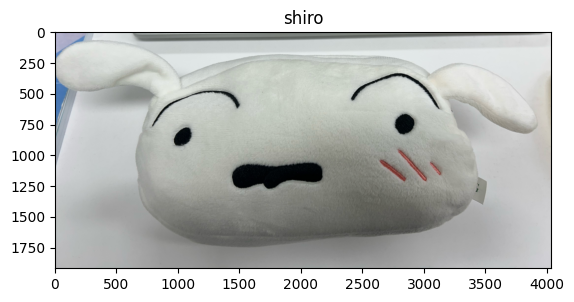

In [21]:
img = plt.imread(img_file)
plt.imshow(img)
plt.title(class_names[np.argmax(prediction)])

# YOLO(own data-predict)
 roboflow 사용해서 api 가져와서 코랩에서 트레인해서 모델얻어서 테스트.  images 필요

In [23]:
!pip install ultralytics

from ultralytics import YOLO

!yolo predict model=yolov8n.pt source =/content/image.webp show = True

import cv2
from google.colab.patches import cv2_imshow
model = YOLO('yolov8n.pt')
img = cv2.imread('/content/zoo.webp')
cv2_imshow(img)

results = model('/content/zoo.webp')
print(results[0].boxes)

print(results[0].boxes.xyxy)
x1,y1,x2,y2 = results[0].boxes.xyxy[0]

#그냥 나오는 거 하나씩 네모네모 그려보기

#results[0]에서 confidence랑 class찾기

print(results[0].boxes.xyxy)
x1,y1,x2,y2 = results[0].boxes.xyxy[0]
print(results[0].boxes.conf)
print(results[0].boxes.cls)

for result in results:
  boxes = result.boxes.xyxy
  classes = result.boxes.cls
  confidences = result.boxes.conf
  names = result.names
  for box, cls, conf in zip(boxes, classes, confidences):
    name = names[int(cls)]
    if names[int(cls)] == 'giraffe':
      x1, y1, x2, y2 = map(int, box)
      cv2.putText(img, f'{name} {conf:.2f}', (x1,y1-5), cv2.FONT_HERSHEY_PLAIN, 1, (0, 255, 0), 3)
      cv2.rectangle(img, (x1, y1), (x2, y2), (0, 0, 255), 3)

cv2_imshow(img)

ERROR: Operation cancelled by user
